In [ ]:
# Import libraries,
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
from matplotlib.ticker import ScalarFormatter

In [ ]:
# Creating a string of the path to main project folder,
path = r"/content/drive/MyDrive/Pythondataanalytics/Instacartanalysis"

In [ ]:
# Import active_customers_orders_products pickle file as dataframe df_cop,
df_cop = pd.read_pickle(os.path.join(path, '2) Data', 'Prepared data', 'active_customers_orders_products.pkl'))

In [ ]:
df_cop.shape

(918018, 41)

#### 6. Create an appropriate visualization to show the distribution of profiles

In [ ]:
# Count how many distinct user_ids there are,
distinct_users = df_cop['user_id'].nunique(),
print(distinct_users)

(122813,)


In [ ]:
# Create df subset with only unique user_id because customer profile frequency needs to use,
#  unique user_ids, not every record of every user_id,
unique_user = df_cop.drop_duplicates(subset=['user_id'])

In [ ]:
unique_user.shape

(122813, 41)

In [ ]:
unique_user['customer_profile_y'].value_counts(dropna=False)

middle-aged male with 1 or more dependants      23117
middle-aged female with 1 or more dependants    22909
old male with 1 or more dependants              11719
old female with 1 or more dependants            11526
young male with 1 or more dependants            11511
young female with 1 or more dependants          11334
middle-aged male with no dependants              7656
middle-aged female with no dependants            7644
young male with no dependants                    3952
young female with no dependants                  3840
old male with no dependants                      3809
old female with no dependants                    3796
Name: customer_profile_y, dtype: int64

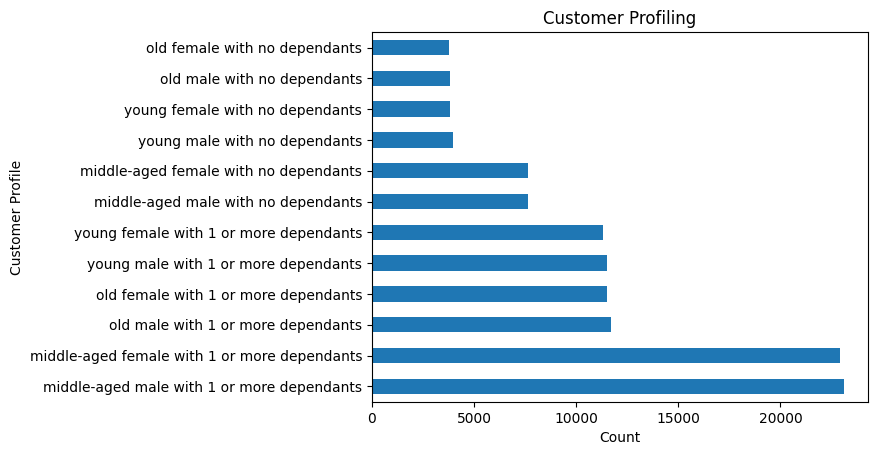

In [ ]:
bar_customer_profile = unique_user['customer_profile_y'].value_counts().plot.barh(title='Customer Profiling', xlabel= 'Count', ylabel= 'Customer Profile')

In [ ]:
# Export chart 'bar_customer_profile',
bar_customer_profile.figure.savefig(os.path.join(path, '4) Analysis','Visualizations', 'bar_customer_profile.png'))

#### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [ ]:
df_cop.columns

Index(['order_id', 'user_id', 'order_number', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order',
       'order_number', 'order_number', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'department',
       'prices', 'price_range_loc', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_price', 'spending_flag',
       'median_orders', 'order_frequency_flag', 'Gender', 'State',
       'customer_region', 'Age', 'date_joined', 'number_of_dependants',
       'fam_status', 'income', 'customer_activity', 'age_group',
       'income_group', 'customer_dependants', 'customer_diet',
       'customer_profile_x', 'customer_profile_y'],
      dtype='object')

In [ ]:
# Create subset of df_cop with select columns,
profiling_agg = df_cop[['customer_profile_y', 'order_id', 'max_order', 'prices']]

In [ ]:
profiling_agg.shape

(918018, 4)

In [ ]:
# Find aggregated max, mean, and min of order frequency (max_order), exependiture (prices) grouped by customer_profile,
profiling_agg.groupby('customer_profile_y').agg({'max_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

max_order                prices  \
                                                   min       mean max    min   
customer_profile_y                                                             
middle-aged female with 1 or more dependants         5  33.719048  99    1.0   
middle-aged female with no dependants                5  34.049929  99    1.0   
middle-aged male with 1 or more dependants           5  33.293071  99    1.0   
middle-aged male with no dependants                  5  34.397841  99    1.0   
old female with 1 or more dependants                 5  33.448513  99    1.0   
old female with no dependants                        5  34.935099  99    1.0   
old male with 1 or more dependants                   5  33.283040  99    1.0   
old male with no dependants                          5  32.160970  99    1.0   
young female with 1 or more dependants               5  33.391296  99    1.0   
young female with no dependants                      5  33.594900  99    1.0   
young male with 1 or more dependants                 5  33.724925  99    1.0   
young male with no dependants                        5  33.296568  99    1.0   

                                                                  
                                                   mean      max  
customer_profile_y                                                
middle-aged female with 1 or more dependants  11.708889  99999.0  
middle-aged female with no dependants         16.007275  99999.0  
middle-aged male with 1 or more dependants    11.803153  99999.0  
middle-aged male with no dependants           12.280130  99999.0  
old female with 1 or more dependants          10.588382  14900.0  
old female with no dependants                 14.318649  99999.0  
old male with 1 or more dependants             9.704969  14900.0  
old male with no dependants                   10.994186  14900.0  
young female with 1 or more dependants        10.902439  99999.0  
young female with no dependants               10.956449  14900.0  
young male with 1 or more dependants          11.343509  99999.0  
young male with no dependants                 16.109748  99999.0

#### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

# Group unique user customer profiles by customer region

In [ ]:
# Unique user id, customer region, and customer profile,
unique_user[['user_id', 'customer_region', 'customer_profile_y']]

,user_id,customer_region,customer_profile_y
0,175298,South,middle-aged female with 1 or more dependants
17,6501,Northeast,middle-aged male with 1 or more dependants
21,180044,Midwest,young male with 1 or more dependants
28,12074,Midwest,young male with 1 or more dependants
46,192641,Midwest,middle-aged male with 1 or more dependants
...,...,...,...
918013,106114,Northeast,middle-aged female with 1 or more dependants
918014,38738,Midwest,young female with 1 or more dependants
918015,26842,Midwest,young female with 1 or more dependants
918016,111810,South,young male with 1 or more dependants


In [ ]:
# Add another column to subset of df_cop,
profiling_agg = df_cop[['customer_region', 'customer_profile_y', 'order_id', 'max_order', 'prices']]

In [ ]:
regional_profiling = profiling_agg.groupby(['customer_region', 'customer_profile_y']).agg({
    'max_order': ['min', 'mean', 'max'],
    'prices': ['min', 'mean', 'max']
}).reset_index()

In [ ]:
regional_profiling

customer_region                            customer_profile_y max_order  \
                                                                       min   
0          Midwest  middle-aged female with 1 or more dependants         5   
1          Midwest         middle-aged female with no dependants         5   
2          Midwest    middle-aged male with 1 or more dependants         5   
3          Midwest           middle-aged male with no dependants         5   
4          Midwest          old female with 1 or more dependants         5   
5          Midwest                 old female with no dependants         5   
6          Midwest            old male with 1 or more dependants         5   
7          Midwest                   old male with no dependants         5   
8          Midwest        young female with 1 or more dependants         5   
9          Midwest               young female with no dependants         5   
10         Midwest          young male with 1 or more dependants         5   
11         Midwest                 young male with no dependants         5   
12       Northeast  middle-aged female with 1 or more dependants         5   
13       Northeast         middle-aged female with no dependants         5   
14       Northeast    middle-aged male with 1 or more dependants         5   
15       Northeast           middle-aged male with no dependants         5   
16       Northeast          old female with 1 or more dependants         5   
17       Northeast                 old female with no dependants         5   
18       Northeast            old male with 1 or more dependants         5   
19       Northeast                   old male with no dependants         5   
20       Northeast        young female with 1 or more dependants         5   
21       Northeast               young female with no dependants         5   
22       Northeast          young male with 1 or more dependants         5   
23       Northeast                 young male with no dependants         5   
24           South  middle-aged female with 1 or more dependants         5   
25           South         middle-aged female with no dependants         5   
26           South    middle-aged male with 1 or more dependants         5   
27           South           middle-aged male with no dependants         5   
28           South          old female with 1 or more dependants         5   
29           South                 old female with no dependants         5   
30           South            old male with 1 or more dependants         5   
31           South                   old male with no dependants         5   
32           South        young female with 1 or more dependants         5   
33           South               young female with no dependants         5   
34           South          young male with 1 or more dependants         5   
35           South                 young male with no dependants         5   
36            West  middle-aged female with 1 or more dependants         5   
37            West         middle-aged female with no dependants         5   
38            West    middle-aged male with 1 or more dependants         5   
39            West           middle-aged male with no dependants         5   
40            West          old female with 1 or more dependants         5   
41            West                 old female with no dependants         5   
42            West            old male with 1 or more dependants         5   
43            West                   old male with no dependants         5   
44            West        young female with 1 or more dependants         5   
45            West               young female with no dependants         5   
46            West          young male with 1 or more dependants         5   
47            West                 young male with no dependants         5   

                  prices                      
         mean max    min       mean      max  
0   33.7

In [ ]:
avg_regional_profiling = profiling_agg.groupby(['customer_region', 'customer_profile_y']).agg({
    'max_order': 'mean',
    'prices': 'mean'
}).reset_index()

In [ ]:
avg_maxorder_regional_profiling = avg_regional_profiling['max_order']

In [ ]:
avg_price_regional_profiling = avg_regional_profiling['prices']

# df of max order number (number of orders customer has purchased) grouped by customer region and customer profile sorted by mean column

In [ ]:
# Create a DataFrame of max order number grouped by customer region and profile
avg_maxorder_regional_profiling = profiling_agg.groupby(['customer_region', 'customer_profile_y'])['max_order'].mean().reset_index()

# Sort the DataFrame by the 'mean' column in descending order
sorted_maxorder_regional_profiling = avg_maxorder_regional_profiling.sort_values(by='max_order', ascending=False)


In [ ]:
# df of average item price purchased grouped by customer region and customer profile,
avg_price_regional_profiling

0     12.021715
1     17.019789
2     11.801722
3     15.106547
4      9.269191
5     10.057143
6     10.067421
7     14.240502
8     14.256341
9     12.465047
10    13.458022
11    40.600015
12    10.267708
13    20.441078
14    10.176562
15     7.754643
16    11.974653
17    10.498924
18     9.637776
19    10.732636
20     7.742306
21     7.737892
22     8.817285
23     7.774721
24    14.226513
25    13.545434
26    14.166986
27    14.519575
28    10.920602
29    24.023964
30     8.817033
31     7.800082
32     8.856345
33    13.862510
34    10.300631
35     9.362422
36     9.183692
37    15.624094
38     9.850541
39     9.786035
40    10.459758
41     7.833054
42    10.579315
43    11.851867
44    12.593831
45     7.760860
46    12.533327
47     9.674652
Name: prices, dtype: float64

In [ ]:
# Bar chart of max order number (number of orders customer has purchased) grouped by,
# customer region and customer profile sorted by mean column,
avg_maxorder_regional_profiling.sort_values(by='max_order', ascending=False).plot.barh, figsize = (12,12)

In [ ]:
# Recheck shape,
df_cop.shape

(918018, 41)